| **Inicio** | **atrás 6** | **Siguiente 8** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./6_Clusters_con_DBSCAN.ipynb)| [⏩](./8_Meta-Clasificadores.ipynb)|

# **7. Optimiza tus Modelos de Machine Learning ajustando Hiperparámetros con Python**

## **Introducción**

La optimización de hiperparámetros es un paso crítico en el proceso de construcción de modelos de machine learning. Los hiperparámetros son valores configurables que afectan el comportamiento y el rendimiento de un algoritmo de machine learning. Ajustar correctamente los hiperparámetros puede llevar a un mejor rendimiento del modelo en datos no vistos. Aquí te proporcionaré una explicación detallada de cómo realizar la optimización de hiperparámetros con Python, junto con un ejemplo y gráficas.

**Pasos para la Optimización de Hiperparámetros:**

1. **Definir Hiperparámetros a Ajustar**: Identifica los hiperparámetros que deseas ajustar. Estos podrían incluir la tasa de aprendizaje, la profundidad máxima del árbol, el número de vecinos en un algoritmo K-NN, etc.

2. **Dividir Datos**: Divide tus datos en conjuntos de entrenamiento y validación o utiliza validación cruzada para evaluar diferentes configuraciones de hiperparámetros.

3. **Definir Rango de Búsqueda**: Define el rango de valores para cada hiperparámetro que deseas probar. Puedes hacer esto usando una lista de valores o utilizando distribuciones.

4. **Iterar a través de Combinaciones**: Utiliza bucles para iterar a través de todas las combinaciones posibles de valores de hiperparámetros. Esto puede hacerse manualmente o utilizando herramientas como Grid Search o Random Search.

5. **Entrenar y Evaluar Modelos**: Para cada combinación de hiperparámetros, entrena un modelo en el conjunto de entrenamiento y evalúalo en el conjunto de validación. Utiliza métricas de evaluación para comparar el rendimiento de los modelos.

6. **Seleccionar Mejor Configuración**: Selecciona la configuración de hiperparámetros que ofrece el mejor rendimiento en el conjunto de validación.

7. **Evaluación Final**: Después de seleccionar la mejor configuración, evalúa el modelo en un conjunto de prueba independiente para obtener una estimación realista de su rendimiento en datos no vistos.

**Ejemplo con Gráficas:**

Supongamos que estamos trabajando con el algoritmo K-Nearest Neighbors (K-NN) y queremos optimizar el número de vecinos ($k$) y la métrica de distancia ($p$). Utilizaremos la librería `scikit-learn` y el conjunto de datos Iris.

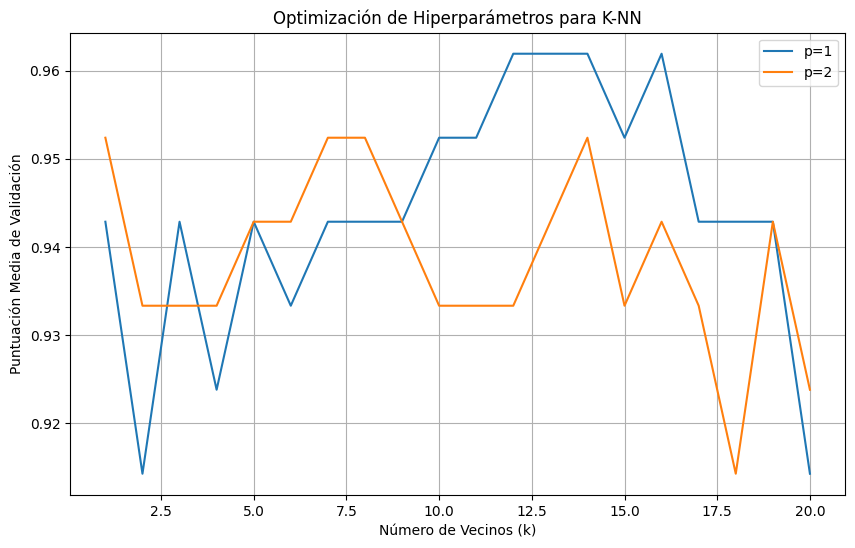

Precisión en el conjunto de prueba: 1.00


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el rango de búsqueda
param_grid = {'n_neighbors': np.arange(1, 21), 'p': [1, 2]}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Ajustar modelos y encontrar la mejor configuración
grid_search.fit(X_train, y_train)

# Obtener la mejor configuración
best_k = grid_search.best_params_['n_neighbors']
best_p = grid_search.best_params_['p']

# Visualizar los resultados de Grid Search
results = grid_search.cv_results_
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], results['mean_test_score'][::len(param_grid['p'])], label='p=1')
plt.plot(param_grid['n_neighbors'], results['mean_test_score'][1::len(param_grid['p'])], label='p=2')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Puntuación Media de Validación')
plt.title('Optimización de Hiperparámetros para K-NN')
plt.legend()
plt.grid()
plt.show()

# Entrenar modelo final con la mejor configuración
final_model = KNeighborsClassifier(n_neighbors=best_k, p=best_p)
final_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
accuracy = final_model.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

**Interpretación de la Visualización:**

En la gráfica, podemos observar cómo varía la puntuación media de validación a medida que ajustamos el número de vecinos ($k$) para dos métricas de distancia diferentes ($p=$) y ($p=2$). La mejor combinación de hiperparámetros es donde obtenemos la puntuación media de validación más alta.

**Conclusión:**

La optimización de hiperparámetros es un proceso esencial para mejorar el rendimiento de los modelos de machine learning. Scikit-learn proporciona herramientas como `GridSearchCV` para automatizar este proceso y encontrar la mejor combinación de hiperparámetros. A través de la visualización de resultados, podemos comprender mejor cómo diferentes valores de hiperparámetros afectan el rendimiento del modelo.

## **Explicación de bosques aleatorios**

## Bosques Aleatorios

Los Bosques Aleatorios (Random Forests) son un algoritmo de aprendizaje automático ampliamente utilizado para tareas de clasificación y regresión. Son una extensión y mejora de los árboles de decisión tradicionales. La idea principal detrás de los Bosques Aleatorios es combinar múltiples árboles de decisión para crear un modelo más robusto y preciso.

### Cómo funcionan

1. **Bootstrap Aggregating (Bagging):** En lugar de usar un solo árbol de decisión, los Bosques Aleatorios construyen varios árboles a partir de diferentes subconjuntos del conjunto de entrenamiento. Esto se logra aplicando el muestreo con reemplazo (bootstrap) al conjunto de datos original, generando múltiples conjuntos de datos de entrenamiento.

2. **Construcción de árboles:** Para cada conjunto de datos de entrenamiento, se construye un árbol de decisión. Sin embargo, durante la construcción de cada árbol, se introducen dos tipos de aleatoriedad:
   - Seleccionar un subconjunto aleatorio de características en cada nodo durante la división.
   - Limitar la profundidad máxima del árbol para evitar el sobreajuste.

3. **Votación y promedio:** Una vez que se han construido todos los árboles, se utiliza un proceso de votación (en el caso de clasificación) o un promedio (en el caso de regresión) para combinar las predicciones de los árboles individuales y llegar a una predicción final.

### Ejemplo de Bosques Aleatorios

Supongamos que queremos clasificar flores en tres categorías (setosa, versicolor y virginica) utilizando el conjunto de datos Iris.

1. **Preparación de datos:** Cargamos el conjunto de datos Iris, dividimos los datos en conjuntos de entrenamiento y prueba, y luego aplicamos el algoritmo de Bosques Aleatorios para la clasificación.

2. **Construcción del Modelo:** Creamos un Bosque Aleatorio con múltiples árboles de decisión. Cada árbol se construirá utilizando un subconjunto aleatorio de características y una profundidad máxima limitada.

3. **Predicción:** Utilizamos el modelo para predecir las clases de las flores en el conjunto de prueba. Luego, aplicamos el proceso de votación para llegar a una predicción final.

4. **Evaluación:** Comparamos las predicciones con las etiquetas reales en el conjunto de prueba para evaluar el rendimiento del modelo.

En resumen, los Bosques Aleatorios son una técnica poderosa que mejora los árboles de decisión individuales mediante la combinación de múltiples modelos y la introducción de aleatoriedad en la construcción de los árboles. Esto da como resultado modelos más precisos y robustos que son ampliamente utilizados en diversas aplicaciones de aprendizaje automático.

## **Hiperparámetros de los bosques**

Los hiperparámetros son configuraciones que se establecen antes de entrenar un modelo de machine learning. A diferencia de los parámetros del modelo, que se aprenden durante el entrenamiento, los hiperparámetros influyen en el proceso de entrenamiento mismo y en cómo se configura el modelo. En el contexto de los Bosques Aleatorios, hay varios hiperparámetros que pueden ajustarse para mejorar el rendimiento del modelo.

Aquí hay algunos hiperparámetros comunes en los Bosques Aleatorios:

1. **n_estimators:** Este hiperparámetro define la cantidad de árboles en el bosque. Cuantos más árboles, más complejo será el modelo y más tiempo llevará el entrenamiento. Sin embargo, un mayor número de árboles generalmente lleva a una mayor precisión y generalización.

2. **max_depth:** Define la profundidad máxima de cada árbol. Controla la complejidad del árbol y previene el sobreajuste. Un valor más bajo limita la profundidad de los árboles y reduce el riesgo de sobreajuste.

3. **min_samples_split:** Establece el número mínimo de muestras requeridas para dividir un nodo. Un valor más alto evita divisiones en nodos con pocos puntos de datos, lo que puede prevenir el sobreajuste.

4. **min_samples_leaf:** Define el número mínimo de muestras requeridas en un nodo hoja. Similar a `min_samples_split`, pero para nodos hoja.

5. **max_features:** Determina la cantidad máxima de características que se considerarán para dividir un nodo en cada árbol. Controla la aleatoriedad y la diversidad de los árboles.

Ahora, aquí tienes un ejemplo con código Python usando la biblioteca Scikit-learn para ajustar y visualizar el efecto de algunos de estos hiperparámetros:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir hiperparámetros para ajustar
n_estimators_range = np.arange(1, 101, 10)
max_depth_range = np.arange(1, 21)
min_samples_split_range = np.arange(2, 11)
min_samples_leaf_range = np.arange(1, 11)

# Almacenar resultados de validación cruzada
scores = []

# Ajustar modelos con diferentes hiperparámetros
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            for min_samples_leaf in min_samples_leaf_range:
                model = RandomForestClassifier(n_estimators=n_estimators,
                                               max_depth=max_depth,
                                               min_samples_split=min_samples_split,
                                               min_samples_leaf=min_samples_leaf,
                                               random_state=42)
                score = model.fit(X_train, y_train).score(X_test, y_test)
                scores.append(score)

# Crear una matriz de resultados para visualización
scores_matrix = np.array(scores).reshape(len(n_estimators_range),
                                          len(max_depth_range),
                                          len(min_samples_split_range),
                                          len(min_samples_leaf_range))

# Encontrar los hiperparámetros con el mejor rendimiento
best_indices = np.unravel_index(np.argmax(scores_matrix), scores_matrix.shape)
best_n_estimators = n_estimators_range[best_indices[0]]
best_max_depth = max_depth_range[best_indices[1]]
best_min_samples_split = min_samples_split_range[best_indices[2]]
best_min_samples_leaf = min_samples_leaf_range[best_indices[3]]

# Visualizar la influencia de los hiperparámetros en el rendimiento
plt.figure(figsize=(12, 8))
plt.imshow(np.mean(scores_matrix, axis=-1), origin='lower', cmap='viridis',
           extent=(min_samples_leaf_range[0], min_samples_leaf_range[-1],
                   min_samples_split_range[0], min_samples_split_range[-1]))
plt.colorbar(label='Puntuación Media')
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.title('Influencia de los Hiperparámetros en el Rendimiento')
plt.scatter(best_min_samples_leaf, best_min_samples_split, marker='o', color='red', label='Mejor Modelo')
plt.legend()
plt.grid()
plt.show()

print(f"Mejor rendimiento obtenido con:\n"
      f"n_estimators = {best_n_estimators}\n"
      f"max_depth = {best_max_depth}\n"
      f"min_samples_split = {best_min_samples_split}\n"
      f"min_samples_leaf = {best_min_samples_leaf}")

Este ejemplo ajusta el modelo de Bosques Aleatorios con diferentes combinaciones de hiperparámetros y luego visualiza cómo influyen en el rendimiento del modelo utilizando un mapa de calor. Al final, se muestra cuáles fueron los hiperparámetros que resultaron en el mejor rendimiento. Recuerda que estos hiperparámetros pueden variar dependiendo del conjunto de datos y el problema específico que estés abordando.

## **Búsqueda en Rejilla (GridSearch)**

La Búsqueda en Rejilla (GridSearch) es una técnica utilizada para encontrar la combinación óptima de hiperparámetros para un modelo de machine learning. Consiste en definir un conjunto de valores posibles para cada hiperparámetro y luego evaluar todas las combinaciones posibles para determinar cuál de ellas produce el mejor rendimiento del modelo. Esta técnica es muy útil para evitar el ajuste manual de hiperparámetros y para automatizar la búsqueda de la mejor configuración.

Aquí tienes un ejemplo de cómo realizar una Búsqueda en Rejilla utilizando la biblioteca Scikit-learn en Python:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir hiperparámetros y sus valores posibles
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, verbose=2, n_jobs=-1)

# Realizar la búsqueda en rejilla en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los resultados y la mejor configuración
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores hiperparámetros: {best_params}")
print(f"Puntuación media de validación cruzada con los mejores hiperparámetros: {best_score:.2f}")

# Visualizar los resultados de la búsqueda en rejilla
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['max_depth']),
                                  len(param_grid['min_samples_split']),
                                  len(param_grid['min_samples_leaf']))
mean_scores = np.mean(scores, axis=0)

plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, origin='lower', cmap='viridis',
           extent=(0, len(param_grid['min_samples_leaf'])-1,
                   0, len(param_grid['min_samples_split'])-1))
plt.colorbar(label='Puntuación Media de Validación Cruzada')
plt.xticks(np.arange(len(param_grid['min_samples_leaf'])), param_grid['min_samples_leaf'])
plt.yticks(np.arange(len(param_grid['min_samples_split'])), param_grid['min_samples_split'])
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')
plt.title('Resultados de la Búsqueda en Rejilla')
plt.grid()
plt.show()

En este ejemplo, primero definimos un conjunto de valores posibles para varios hiperparámetros del modelo RandomForestClassifier. Luego, creamos un objeto GridSearchCV con el modelo a ajustar, los hiperparámetros definidos, el número de particiones en la validación cruzada (cv), la verbosidad (verbose) y el número de trabajadores en paralelo (n_jobs). Luego, ajustamos el GridSearchCV a los datos de entrenamiento.

Después de ajustar, podemos acceder a los mejores hiperparámetros y la mejor puntuación media de validación cruzada. Además, visualizamos los resultados de la búsqueda en rejilla en un mapa de calor para ver cómo se comporta el rendimiento del modelo con diferentes combinaciones de hiperparámetros.

La Búsqueda en Rejilla es una técnica poderosa para encontrar la mejor configuración de hiperparámetros, ya que automatiza el proceso de evaluación de múltiples combinaciones y ayuda a optimizar el rendimiento del modelo.

## **Información de la Rejilla**

La "rejilla" en el contexto de la Búsqueda en Rejilla (GridSearch) se refiere a un conjunto predefinido de combinaciones de valores de hiperparámetros que se utilizarán para buscar la mejor configuración para un modelo de machine learning. Cada combinación en la rejilla representa un punto en el espacio de hiperparámetros que será evaluado para determinar su rendimiento en términos de métricas como precisión, exactitud, F1-score, etc.

A continuación, te proporcionaré una explicación detallada junto con un ejemplo y su respectiva visualización en código Python:

Supongamos que estamos utilizando un clasificador de Bosque Aleatorio y queremos optimizar los hiperparámetros relacionados con la profundidad del árbol, el número de estimadores y la cantidad mínima de muestras para dividir un nodo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],  # Diferentes números de estimadores
    'max_depth': [None, 10, 20],      # Diferentes profundidades máximas
    'min_samples_split': [2, 5, 10],  # Diferentes cantidades mínimas de muestras para dividir un nodo
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, verbose=2, n_jobs=-1)

# Realizar la búsqueda en rejilla en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Visualizar la rejilla y los resultados
results = grid_search.cv_results_

# Crear una figura con subplots
fig, axs = plt.subplots(len(param_grid['max_depth']), len(param_grid['min_samples_split']),
                        figsize=(10, 6), sharex=True, sharey=True)

# Recorrer cada combinación de hiperparámetros
for i, max_depth in enumerate(param_grid['max_depth']):
    for j, min_samples_split in enumerate(param_grid['min_samples_split']):
        idx = i * len(param_grid['min_samples_split']) + j
        scores = results['mean_test_score'].reshape(len(param_grid['max_depth']),
                                                    len(param_grid['min_samples_split']))
        ax = axs[i, j]
        im = ax.imshow(scores, cmap='viridis', aspect='auto')
        ax.set_xticks(np.arange(len(param_grid['n_estimators'])))
        ax.set_yticks(np.arange(len(param_grid['n_estimators'])))
        ax.set_xticklabels(param_grid['n_estimators'])
        ax.set_yticklabels(param_grid['n_estimators'])
        ax.set_xlabel('n_estimators')
        ax.set_ylabel('n_estimators')
        ax.set_title(f"max_depth={max_depth}, min_samples_split={min_samples_split}")
        plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

En este ejemplo, hemos definido una rejilla de hiperparámetros llamada `param_grid`, que contiene diferentes valores posibles para el número de estimadores, la profundidad máxima y la cantidad mínima de muestras para dividir un nodo. Luego, hemos creado un objeto `GridSearchCV` con el modelo de Bosque Aleatorio, la rejilla de hiperparámetros y otros parámetros relevantes. Después de ajustar el GridSearchCV a los datos de entrenamiento, hemos visualizado los resultados de la rejilla utilizando un conjunto de subplots.

La visualización muestra cómo varía la puntuación media de validación cruzada para diferentes combinaciones de hiperparámetros en la rejilla. Cada subplot representa una combinación específica de valores de profundidad máxima y cantidad mínima de muestras para dividir un nodo, y el color indica la puntuación media de validación cruzada. Esta visualización ayuda a identificar las combinaciones de hiperparámetros que producen el mejor rendimiento para el modelo.

En resumen, la rejilla en la Búsqueda en Rejilla se refiere al conjunto de valores posibles para los hiperparámetros que se evaluarán exhaustivamente para encontrar la mejor configuración del modelo. La visualización de la rejilla proporciona información valiosa sobre cómo varía el rendimiento del modelo en función de diferentes combinaciones de hiperparámetros.

## **Validación cruzada y Rejilla**

La validación cruzada y la búsqueda en rejilla son dos técnicas fundamentales en el proceso de ajuste y evaluación de modelos de machine learning. La validación cruzada es una estrategia para evaluar el rendimiento de un modelo de manera más robusta, mientras que la búsqueda en rejilla permite encontrar la combinación óptima de hiperparámetros para un modelo. A continuación, explicaré cada concepto en detalle con ejemplos y su respectivo código en Python.

### Validación Cruzada:

La validación cruzada es una técnica que se utiliza para evaluar el rendimiento de un modelo de manera más confiable que simplemente dividir los datos en conjuntos de entrenamiento y prueba. En lugar de una única división, la validación cruzada implica dividir los datos en múltiples subconjuntos y realizar entrenamiento y prueba en diferentes combinaciones. Esto ayuda a obtener una estimación más precisa del rendimiento del modelo en datos no vistos.

Ejemplo de validación cruzada:

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un modelo de regresión logística
model = LogisticRegression()

# Realizar validación cruzada con 5 pliegues
scores = cross_val_score(model, X, y, cv=5)

# Imprimir los puntajes de validación cruzada
print("Puntajes de Validación Cruzada:", scores)
print("Precisión Promedio:", np.mean(scores))

En este ejemplo, hemos utilizado `cross_val_score` para realizar validación cruzada con 5 pliegues en un modelo de regresión logística. El resultado es una matriz de puntajes de validación cruzada para cada pliegue. El promedio de estos puntajes nos da una estimación más precisa de la precisión del modelo en datos no vistos.

### Búsqueda en Rejilla (GridSearch):

La búsqueda en rejilla es una técnica para encontrar la mejor combinación de hiperparámetros para un modelo. Implica definir una "rejilla" de posibles valores para cada hiperparámetro y evaluar todas las combinaciones posibles para encontrar la que produce el mejor rendimiento en términos de alguna métrica.

Ejemplo de búsqueda en rejilla:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],  # Diferentes números de estimadores
    'max_depth': [None, 10, 20],      # Diferentes profundidades máximas
    'min_samples_split': [2, 5, 10],  # Diferentes cantidades mínimas de muestras para dividir un nodo
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, verbose=2, n_jobs=-1)

# Realizar la búsqueda en rejilla en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener la mejor configuración
best_params = grid_search.best_params_
print("Mejor Configuración:", best_params)

En este ejemplo, hemos utilizado `GridSearchCV` para realizar una búsqueda en rejilla en un modelo de Bosque Aleatorio. Hemos definido una rejilla de posibles valores para los hiperparámetros `n_estimators`, `max_depth` y `min_samples_split`. El objeto `GridSearchCV` realiza todas las combinaciones posibles de estos hiperparámetros en los datos de entrenamiento y selecciona la combinación que produce el mejor rendimiento.

En resumen, la validación cruzada es una técnica para evaluar el rendimiento del modelo de manera robusta, y la búsqueda en rejilla es una técnica para encontrar la mejor combinación de hiperparámetros para un modelo. Ambas técnicas son esenciales para desarrollar y ajustar modelos de machine learning de manera efectiva y confiable.

## **Conjuntos de hiperparámetros explorados**

Los conjuntos de hiperparámetros explorados se refieren a las combinaciones de diferentes valores de hiperparámetros que se prueban durante una búsqueda en rejilla para encontrar la configuración óptima de un modelo. Cada combinación en el conjunto de hiperparámetros explorados se evalúa mediante validación cruzada para determinar qué combinación produce el mejor rendimiento en términos de alguna métrica.

A continuación, te mostraré un ejemplo utilizando el conjunto de datos Iris y la técnica de búsqueda en rejilla para explorar diferentes combinaciones de hiperparámetros en un modelo de Bosque Aleatorio. Utilizaremos la librería Scikit-learn en Python para esto.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],  # Diferentes números de estimadores
    'max_depth': [None, 10, 20],      # Diferentes profundidades máximas
    'min_samples_split': [2, 5, 10],  # Diferentes cantidades mínimas de muestras para dividir un nodo
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, verbose=2, n_jobs=-1)

# Realizar la búsqueda en rejilla en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda en rejilla
results = grid_search.cv_results_

# Graficar los resultados de la búsqueda en rejilla
plt.figure(figsize=(12, 8))

# Para cada hiperparámetro, graficar los puntajes promedio de validación cruzada
for param_name in param_grid.keys():
    param_values = param_grid[param_name]
    mean_scores = results['mean_test_score'][results['param_' + param_name].data == param_values]
    plt.plot(param_values, mean_scores, marker='o', label=param_name)

plt.xlabel('Valor del Hiperparámetro')
plt.ylabel('Puntaje Promedio de Validación Cruzada')
plt.title('Exploración de Hiperparámetros con GridSearchCV')
plt.legend()
plt.grid()
plt.show()

# Obtener la mejor configuración
best_params = grid_search.best_params_
print("Mejor Configuración:", best_params)

En este ejemplo, hemos definido un conjunto de hiperparámetros explorados en `param_grid`. Luego, utilizamos la técnica de búsqueda en rejilla (`GridSearchCV`) para explorar todas las combinaciones posibles de estos hiperparámetros en los datos de entrenamiento. Después de realizar la búsqueda en rejilla, hemos obtenido los resultados y graficado los puntajes promedio de validación cruzada para cada valor de hiperparámetro. El punto más alto en la gráfica representa la combinación óptima de hiperparámetros.

En resumen, los conjuntos de hiperparámetros explorados son las diferentes combinaciones de valores de hiperparámetros que se prueban durante la búsqueda en rejilla. Graficar estos resultados puede ayudarnos a comprender cómo varía el rendimiento del modelo en función de los diferentes valores de hiperparámetros, lo que nos permite seleccionar la configuración óptima.

## **Ranking de los mejores modelos**

El ranking de los mejores modelos se refiere a la clasificación de diferentes configuraciones de modelos en función de su rendimiento evaluado mediante métricas específicas. Esto se hace para identificar y seleccionar el modelo que proporciona el mejor rendimiento en un conjunto de datos dado. La técnica de búsqueda en rejilla, junto con la validación cruzada, es una forma común de generar y clasificar estos modelos para encontrar el mejor.

A continuación, te mostraré cómo generar un ranking de los mejores modelos utilizando la librería Scikit-learn en Python. Utilizaremos el mismo conjunto de datos Iris y una búsqueda en rejilla para explorar diferentes combinaciones de hiperparámetros en un modelo de Bosque Aleatorio.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, verbose=2, n_jobs=-1)

# Realizar la búsqueda en rejilla en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda en rejilla
results = grid_search.cv_results_

# Crear una lista de tuplas con los valores de hiperparámetros y su puntaje promedio
models = []
for i in range(len(results['params'])):
    params = results['params'][i]
    score = results['mean_test_score'][i]
    models.append((params, score))

# Ordenar los modelos por puntaje en orden descendente
models.sort(key=lambda x: x[1], reverse=True)

# Imprimir el ranking de los mejores modelos
print("Ranking de los Mejores Modelos:")
for i, (params, score) in enumerate(models):
    print(f"Modelo {i+1}:")
    print(f"Hiperparámetros: {params}")
    print(f"Puntaje Promedio de Validación Cruzada: {score:.4f}")
    print()

# Graficar los puntajes promedio de validación cruzada de los mejores modelos
plt.figure(figsize=(12, 6))
scores = [score for _, score in models]
plt.bar(range(len(scores)), scores, tick_label=[f"Modelo {i+1}" for i in range(len(models))])
plt.xlabel('Modelo')
plt.ylabel('Puntaje Promedio de Validación Cruzada')
plt.title('Ranking de los Mejores Modelos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este ejemplo, primero hemos realizado la búsqueda en rejilla con el mismo proceso que se explicó anteriormente. Luego, hemos creado una lista de tuplas que contiene los valores de hiperparámetros y sus puntajes promedio de validación cruzada correspondientes. Después, hemos ordenado los modelos en orden descendente según sus puntajes.

Finalmente, hemos impreso el ranking de los mejores modelos con sus hiperparámetros y puntajes promedio de validación cruzada. También hemos graficado los puntajes promedio de validación cruzada de los mejores modelos para visualizar su rendimiento relativo.

En resumen, el ranking de los mejores modelos nos ayuda a identificar las configuraciones de modelos que tienen el mejor rendimiento en función de las métricas seleccionadas. Esto nos permite tomar decisiones informadas sobre qué configuración de modelo utilizar en una aplicación dada.

## **Los mejores hiperparámetros**

En el contexto del aprendizaje automático, los hiperparámetros son configuraciones que se establecen antes del proceso de entrenamiento del modelo y que no son aprendidos directamente del conjunto de datos. Elegir los mejores hiperparámetros es crucial para obtener un modelo con buen rendimiento. La búsqueda en rejilla es una técnica común para encontrar los mejores valores de hiperparámetros a través de la exploración sistemática de diferentes combinaciones.

En este ejemplo, utilizaremos el conjunto de datos Iris y un modelo de Bosque Aleatorio para demostrar cómo encontrar los mejores hiperparámetros utilizando la búsqueda en rejilla con Scikit-learn en Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, verbose=2, n_jobs=-1)

# Realizar la búsqueda en rejilla en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores Hiperparámetros:", best_params)

En este ejemplo, hemos definido una rejilla de hiperparámetros que contiene diferentes valores para los hiperparámetros `n_estimators`, `max_depth` y `min_samples_split`. Luego, hemos creado un objeto GridSearchCV con un modelo RandomForestClassifier y la rejilla de hiperparámetros.

Al ajustar el objeto GridSearchCV a los datos de entrenamiento, realiza una búsqueda en rejilla exhaustiva y evalúa el rendimiento del modelo en diferentes combinaciones de hiperparámetros utilizando validación cruzada.

Finalmente, el atributo `best_params_` del objeto GridSearchCV contiene los mejores hiperparámetros encontrados durante la búsqueda en rejilla. Puedes imprimir esta información para identificar qué combinación de hiperparámetros produjo el mejor rendimiento en el conjunto de entrenamiento.

Es importante señalar que este ejemplo muestra cómo encontrar los mejores hiperparámetros para un modelo específico. En la práctica, puedes aplicar la misma técnica a otros algoritmos de aprendizaje automático ajustando la configuración de la rejilla y los parámetros de los modelos según corresponda.

## **Usando el mejor modelo**

Claro, puedo guiarte a través de cómo utilizar el mejor modelo obtenido a partir de la búsqueda en rejilla para hacer predicciones y evaluar su rendimiento en un conjunto de prueba. Usaremos el mismo ejemplo con el conjunto de datos Iris y el modelo de Bosque Aleatorio que utilizamos anteriormente. Asegúrate de haber ejecutado el código de búsqueda en rejilla para obtener los mejores hiperparámetros antes de continuar con este ejemplo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir la rejilla de hiperparámetros (puede ser la misma que usaste en la búsqueda en rejilla)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, verbose=2, n_jobs=-1)

# Realizar la búsqueda en rejilla en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear y entrenar el mejor modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir los resultados
print("Precisión en el conjunto de prueba:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)
print("Informe de Clasificación:\n", class_report)

En este ejemplo, hemos creado y entrenado el mejor modelo utilizando los hiperparámetros óptimos que encontramos a través de la búsqueda en rejilla. Luego, utilizamos este modelo para hacer predicciones en el conjunto de prueba `X_test`. Finalmente, evaluamos el rendimiento del modelo utilizando métricas como la precisión, la matriz de confusión y el informe de clasificación.

Recuerda que el proceso de ajuste de hiperparámetros y evaluación del modelo puede variar según el conjunto de datos y el algoritmo utilizado. En este caso, estamos utilizando el modelo de Bosque Aleatorio, pero puedes aplicar un proceso similar a otros modelos de aprendizaje automático.

## **Búsqueda aleatoria (RandomizedSearch)**

La búsqueda aleatoria (RandomizedSearch) es un enfoque alternativo a la búsqueda en rejilla para encontrar los mejores hiperparámetros para un modelo de aprendizaje automático. A diferencia de la búsqueda en rejilla, que evalúa todas las combinaciones posibles de hiperparámetros de manera exhaustiva, la búsqueda aleatoria selecciona combinaciones de hiperparámetros de manera aleatoria y las evalúa en función del rendimiento del modelo.

La búsqueda aleatoria es útil cuando el espacio de hiperparámetros es grande y no es factible evaluar todas las combinaciones posibles. Proporciona una manera más eficiente de explorar diferentes configuraciones y encontrar combinaciones que puedan ser prometedoras, sin gastar recursos en probar todas las combinaciones posibles.

Aquí tienes un ejemplo de cómo realizar una búsqueda aleatoria utilizando Scikit-learn en Python:

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el rango de búsqueda aleatoria para los hiperparámetros
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
}

# Crear un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, random_state=42, verbose=2, n_jobs=-1)

# Realizar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_

# Crear y entrenar el mejor modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy = best_model.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

En este ejemplo, hemos creado un objeto `RandomizedSearchCV` y definido un rango de búsqueda aleatoria para los hiperparámetros. El número de iteraciones (`n_iter`) determina cuántas combinaciones aleatorias de hiperparámetros se probarán. Luego, realizamos la búsqueda aleatoria en los datos de entrenamiento y obtenemos los mejores hiperparámetros. Finalmente, creamos y entrenamos el mejor modelo utilizando estos hiperparámetros y evaluamos su rendimiento en el conjunto de prueba.

La búsqueda aleatoria es especialmente útil cuando el espacio de hiperparámetros es grande y no es práctico evaluar todas las combinaciones posibles. Sin embargo, es posible que la búsqueda aleatoria no sea tan exhaustiva como la búsqueda en rejilla en la exploración completa del espacio de hiperparámetros.

## **Hiperparámetros explorados aleatoriamente**

Los hiperparámetros explorados aleatoriamente se refieren a las combinaciones de valores de hiperparámetros que se seleccionan de manera aleatoria dentro de un rango predefinido. Esta técnica se utiliza en la búsqueda aleatoria (RandomizedSearch) para encontrar combinaciones prometedoras de hiperparámetros que puedan mejorar el rendimiento del modelo de machine learning.

A diferencia de la búsqueda en rejilla, que explora todas las combinaciones posibles de hiperparámetros, la búsqueda aleatoria selecciona un número fijo de combinaciones aleatorias y las evalúa. Esta técnica es útil cuando el espacio de hiperparámetros es grande y no es práctico explorar todas las combinaciones debido a limitaciones de recursos y tiempo.

Aquí hay un ejemplo que ilustra cómo explorar hiperparámetros aleatoriamente utilizando Scikit-learn en Python:

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el rango de búsqueda aleatoria para los hiperparámetros
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
}

# Crear un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, random_state=42, verbose=2, n_jobs=-1)

# Realizar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los resultados de las combinaciones exploradas aleatoriamente
results = random_search.cv_results_

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.bar(range(len(results['params'])), results['mean_test_score'], tick_label=[str(p) for p in results['params']])
plt.xlabel('Combinaciones de Hiperparámetros')
plt.ylabel('Puntuación Media de Validación')
plt.title('Exploración Aleatoria de Hiperparámetros')
plt.xticks(rotation=45, ha="right")
plt.show()

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores Hiperparámetros:", best_params)

En este ejemplo, hemos definido un rango de búsqueda aleatoria para los hiperparámetros del modelo RandomForestClassifier. Utilizamos un objeto `RandomizedSearchCV` para explorar 10 combinaciones aleatorias dentro de ese rango. Luego, visualizamos los resultados de las combinaciones exploradas en una gráfica de barras donde cada barra representa una combinación de hiperparámetros y su puntuación media de validación.

Los hiperparámetros explorados aleatoriamente son esenciales para encontrar combinaciones prometedoras que puedan mejorar el rendimiento del modelo, especialmente cuando el espacio de hiperparámetros es grande y no es práctico explorar todas las combinaciones posibles.

| **Inicio** | **atrás 6** | **Siguiente 8** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./6_Clusters_con_DBSCAN.ipynb)| [⏩](./8_Meta-Clasificadores.ipynb)|